In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
# hide warnings
import warnings
warnings.filterwarnings('ignore')

# MISS GRAND DATA

In [138]:
msg = pd.read_csv('df_all_update.csv')
msg.info()
msg.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100523 entries, 0 to 100522
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   time_text    100523 non-null  object
 1   author.name  100504 non-null  object
 2   author.id    100523 non-null  object
 3   message      100522 non-null  object
 4   dtect_lang   100523 non-null  object
 5   trans_eng    100523 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


,time_text,author.name,author.id,message,dtect_lang,trans_eng
0,-0:24,Venancio Reyna,UCeSuNe9wK0n2bahv0X6PkZQ,México :sparkles::heart_on_fire:,en,México :sparkles::heart_on_fire:
1,-0:23,Ploylymumu,UCos_UgTKQQZEUXLbbl2Y9dg,🇹🇭:blue_heart:,en,🇹🇭:blue_heart:
2,-0:23,Oemah Printing,UC1XCKk9xzLwUMgY8f7QsdYQ,indonesia,id,Indonesia
3,-0:23,Tiên Hoàng,UCnXDXORGJCjrgsa7TkikVEw,VIỆT NAM 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,vi,Vietnam 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳
4,-0:21,TRUONG NGUYEN,UCYVwchNJN8uZbD7SWFGaL5g,VIỆT NAM 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,vi,Vietnam 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳


In [193]:
df_message = msg.drop(columns = ['dtect_lang'])
df_message.dropna(inplace=True)
df_message.drop(df_message.loc[df_message['trans_eng'] == 'error'].index, inplace=True)

display(df_message.info())
display(df_message.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94648 entries, 0 to 100522
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   time_text    94648 non-null  object
 1   author.name  94648 non-null  object
 2   author.id    94648 non-null  object
 3   message      94648 non-null  object
 4   trans_eng    94648 non-null  object
dtypes: object(5)
memory usage: 4.3+ MB


None

,time_text,author.name,author.id,message,trans_eng
0,-0:24,Venancio Reyna,UCeSuNe9wK0n2bahv0X6PkZQ,México :sparkles::heart_on_fire:,México :sparkles::heart_on_fire:
1,-0:23,Ploylymumu,UCos_UgTKQQZEUXLbbl2Y9dg,🇹🇭:blue_heart:,🇹🇭:blue_heart:
2,-0:23,Oemah Printing,UC1XCKk9xzLwUMgY8f7QsdYQ,indonesia,Indonesia
3,-0:23,Tiên Hoàng,UCnXDXORGJCjrgsa7TkikVEw,VIỆT NAM 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳
4,-0:21,TRUONG NGUYEN,UCYVwchNJN8uZbD7SWFGaL5g,VIỆT NAM 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳


EMOJI DETECTION, REMOVAL, COUNT, TRANSFORM

- Emoji Detection and Remove Emoji Flag

In [75]:
import advertools as adv
import re
import emoji

In [194]:
list_message = df_message['message'].tolist()
emoji_summary = adv.extract_emoji(list_message)

In [199]:
def remove_emoji_flag(text):
    emoji_pattern = re.compile(
        u'(\U0001F1F2\U0001F1F4)|'       # Macau flag
        u'([\U0001F1E6-\U0001F1FF]{2})|' # flags
        u'([\U0001F600-\U0001F64F])'     # emoticons
        "+", flags=re.UNICODE)

    return emoji_pattern.sub('', text)


'''
def remove_emoji_all(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+"
        ":[a-z_]+:", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)
'''

'\ndef remove_emoji_all(text):\n    emoji_pattern = re.compile("["\n        u"😀-🙏"  # emoticons\n        u"🌀-🗿"  # symbols & pictographs\n        u"🚀-\U0001f6ff"  # transport & map symbols\n        u"\U0001f1e0-🇿"  # flags (iOS)\n        u"🇲-🇴"  # Macau flag\n        u"🇦-🇿"  # flags\n        u"😀-🙏"\n        u"✂-➰"\n        u"Ⓜ-🉑"\n        u"🤦-🤷"\n        u"🇲"\n        u"🇴"\n        u"😠"\n        u"\u200d"\n        u"♀-♂"\n        "]+"\n        ":[a-z_]+:", flags=re.UNICODE)\n\n    return emoji_pattern.sub(r\'\', text)\n'

In [200]:
df_message['msg_emoji_noflag'] = df_message['trans_eng'].apply(remove_emoji_flag)
df_message

,time_text,author.name,author.id,message,trans_eng,msg_emoji_noflag
0,-0:24,Venancio Reyna,UCeSuNe9wK0n2bahv0X6PkZQ,México :sparkles::heart_on_fire:,México :sparkles::heart_on_fire:,México :sparkles::heart_on_fire:
1,-0:23,Ploylymumu,UCos_UgTKQQZEUXLbbl2Y9dg,🇹🇭:blue_heart:,🇹🇭:blue_heart:,:blue_heart:
2,-0:23,Oemah Printing,UC1XCKk9xzLwUMgY8f7QsdYQ,indonesia,Indonesia,Indonesia
3,-0:23,Tiên Hoàng,UCnXDXORGJCjrgsa7TkikVEw,VIỆT NAM 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam
4,-0:21,TRUONG NGUYEN,UCYVwchNJN8uZbD7SWFGaL5g,VIỆT NAM 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam
...,...,...,...,...,...,...
100518,3:47:41,Nusaba Monhinlad,UCpLe268BLWDUU1D8_s52uYw,อิงฟ้ารอง 1 ค่ะ,Ing Fah secondary,Ing Fah secondary
100519,3:47:41,Pitan Danlammajak,UCX2klqZuIij7ogH-dUf3QEg,เก่งที่สุดแล้วไทยแลนด์,"The best, Thailand","The best, Thailand"
100520,3:47:42,Sorayut Hitjamnong,UC9CoLEJZCcliohVQXvc8FBw,พี่ฟ้าเก่งที่สุดด สมมง:crown:🇧🇷 เลิฟฟ,Elder Fah is the best. Suppose: Crown: 🇧🇷 Leff,Elder Fah is the best. Suppose: Crown: Leff
100521,3:47:42,faii jilada,UCQmGE4TT2eZQBXehqCZbw-g,สมแล้ววว พี่อิงมาไกลสุดๆเลยยยย,"Alright, elder Ing has come so far.","Alright, elder Ing has come so far."


- Emoji Summary(Exclude Flag) and Count

In [202]:
list_message = df_message['msg_emoji_noflag'].tolist()
emoji_summary = adv.extract_emoji(list_message)
df_emoji = pd.DataFrame(emoji_summary['top_emoji'])

,0,1
0,✌🏻,301
1,👸🏻,217
2,👏🏻,84
3,☝🏻,67
4,👸🏼,62
...,...,...
59,✊🏻,1
60,💪🏿,1
61,♂,1
62,🧚🏻,1


In [231]:
df_emoji = df_emoji.rename(columns={0:'Emoji',1:'Count'})
total_emoji = df_emoji['Count'].sum()
df_emoji['Percent'] = (df_emoji['Count'] / total_emoji)*100
display(df_emoji)

,Emoji,Count,Percent
0,✌🏻,301,27.313975
1,👸🏻,217,19.691470
2,👏🏻,84,7.622505
3,☝🏻,67,6.079855
4,👸🏼,62,5.626134
...,...,...,...
59,✊🏻,1,0.090744
60,💪🏿,1,0.090744
61,♂,1,0.090744
62,🧚🏻,1,0.090744


- Convert Emoji to Text

In [81]:
def convert_emoji(text):
    return emoji.demojize(text)

In [82]:
df_message['messages_eng'] = df_message['msg_emoji_noflag'].apply(convert_emoji)
df_message

,time_text,author.name,author.id,message,trans_eng,msg_emoji_noflag,messages_eng
0,-0:24,Venancio Reyna,UCeSuNe9wK0n2bahv0X6PkZQ,México :sparkles::heart_on_fire:,México :sparkles::heart_on_fire:,México :sparkles::heart_on_fire:,México :sparkles::heart_on_fire:
1,-0:23,Ploylymumu,UCos_UgTKQQZEUXLbbl2Y9dg,🇹🇭:blue_heart:,🇹🇭:blue_heart:,:blue_heart:,:blue_heart:
2,-0:23,Oemah Printing,UC1XCKk9xzLwUMgY8f7QsdYQ,indonesia,Indonesia,Indonesia,Indonesia
3,-0:23,Tiên Hoàng,UCnXDXORGJCjrgsa7TkikVEw,VIỆT NAM 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam,Vietnam
4,-0:21,TRUONG NGUYEN,UCYVwchNJN8uZbD7SWFGaL5g,VIỆT NAM 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam,Vietnam
...,...,...,...,...,...,...,...
100518,3:47:41,Nusaba Monhinlad,UCpLe268BLWDUU1D8_s52uYw,อิงฟ้ารอง 1 ค่ะ,Ing Fah secondary,Ing Fah secondary,Ing Fah secondary
100519,3:47:41,Pitan Danlammajak,UCX2klqZuIij7ogH-dUf3QEg,เก่งที่สุดแล้วไทยแลนด์,"The best, Thailand","The best, Thailand","The best, Thailand"
100520,3:47:42,Sorayut Hitjamnong,UC9CoLEJZCcliohVQXvc8FBw,พี่ฟ้าเก่งที่สุดด สมมง:crown:🇧🇷 เลิฟฟ,Elder Fah is the best. Suppose: Crown: 🇧🇷 Leff,Elder Fah is the best. Suppose: Crown: Leff,Elder Fah is the best. Suppose: Crown: Leff
100521,3:47:42,faii jilada,UCQmGE4TT2eZQBXehqCZbw-g,สมแล้ววว พี่อิงมาไกลสุดๆเลยยยย,"Alright, elder Ing has come so far.","Alright, elder Ing has come so far.","Alright, elder Ing has come so far."


EXTRACT COUNTRY FROM MESSAGES

In [83]:
df_message.drop(columns=['trans_eng','msg_emoji_noflag'],inplace=True)

In [84]:
###### 3.1 extract from name ######
import pycountry
def extract_country(text):
    for country in pycountry.countries:
        # if country.name or country.alpha_2 or country.alpha_3 or country.flag in text:
        if country.name.lower() in text.lower():
            return country.name   
    return 'N/A'

###### 3.2 country_nospace ######
def extract_country_nospace(text):
    for country in pycountry.countries:
        # if country.name or country.alpha_2 or country.alpha_3 or country.flag in text:
        if country.name.lower().replace(' ', '') in text.lower():
            return country.name   
    return 'N/A'

###### 3.3 flag ######
def extract_flag(text):
    for country in pycountry.countries:
        # if country.name or country.alpha_2 or country.alpha_3 or country.flag in text:
        if country.flag in text:
            return country.name        
    return 'N/A'


###### 3.5 regex ######
import re
import pycountry

def extract_country_re(text):
    # Get a list of all country names
    countries = [country.name.lower() for country in pycountry.countries]
    # Join the country names into a single string with '|' separators
    pattern = '|'.join(countries)
    # Compile the regular expression pattern
    regex = re.compile(pattern)
    # Find the first match in the text
    match = regex.search(text.lower())
    # Return the matched country name, or 'N/A' if no match was found
    return match.group() if match else 'N/A'

def extract_country_re2(text):
    # Get a list of all country names and common abbreviations
    countries = [country.name for country in pycountry.countries]
    countries += [country.alpha_2 for country in pycountry.countries]
    countries += [country.alpha_3 for country in pycountry.countries]   
    # Join the country names and abbreviations into a single string with '|' separators
    pattern = '|'.join(countries)  
    # Add regex pattern to match variations in country names
    # (e.g. 'United States' or 'United St.' or 'U.S.' or 'USA')
    # Allow for optional spaces between words
    pattern = r'\b(?:{})\b'.format(pattern)
    pattern = pattern.replace(' ', r'\s*') 
    # Compile the regular expression pattern
    regex = re.compile(pattern, re.IGNORECASE)
    # Find the first match in the text
    match = regex.search(text)
    # Return the matched country name, or 'N/A' if no match was found
    return match.group() if match else 'N/A'

def extract_country_re3(text):
    # Get a list of all country names and common abbreviations
    countries = [country.name.lower() for country in pycountry.countries]
    countries += [country.name.lower().replace(' ', '') for country in pycountry.countries]
    countries += [country.alpha_2.lower() for country in pycountry.countries]
    countries += [country.alpha_3.lower() for country in pycountry.countries]
    # Join the country names and abbreviations into a single string with '|' separators
    pattern = '|'.join(countries)

    # Add regex pattern to match variations in country names
    # (e.g. 'United States' or 'United St.' or 'U.S.' or 'USA')
    # Allow for optional spaces between words
    pattern = r'\b(?:{})\b'.format(pattern)
    pattern = pattern.replace(' ', r'\s*')
    # Compile the regular expression pattern
    regex = re.compile(pattern, re.IGNORECASE)
    # Find all matches in the text
    matches = regex.findall(text)
    # Return the list of matches, or an empty list if no matches were found
    return matches

###### 3.6 NLTK ######
import nltk
def extract_country_nltk(text):
    try:
        # Tokenize the text
        tokens = nltk.word_tokenize(text)
        # Part-of-speech tag the tokens
        pos_tags = nltk.pos_tag(tokens)
        # Perform named entity recognition
        entities = nltk.ne_chunk(pos_tags)
        # Extract the location entities from the named entity tree
        locations = [e[0] for e in entities if isinstance(e, nltk.tree.Tree) and e.label() == 'GPE']
        # # Return the list of locations, or an empty list if no locations were found
        return locations
    except:
        return "error"

def extract_country_nltk_2(text):
    for i in enumerate(text):
        ii = i[1][0].lower()
        for country in pycountry.countries:
            if ii in country.name.lower():
                return country.name
            elif ii in country.name.lower().replace(' ', ''):
                return country.name
    return 'N/A'

def extract_country_nltk_3(text):    
    # Get a list of all country names and common abbreviations
    countries = [country.name.lower() for country in pycountry.countries]
    countries += [country.name.lower().replace(' ', '') for country in pycountry.countries]
    countries += [country.alpha_2.lower() for country in pycountry.countries]
    countries += [country.alpha_3.lower() for country in pycountry.countries]
   
    # Join the country names and abbreviations into a single string with '|' separators
    pattern = '|'.join(countries) 
    # Add regex pattern to match variations in country names
    # (e.g. 'United States' or 'United St.' or 'U.S.' or 'USA')
    # Allow for optional spaces between words
    pattern = r'\b(?:{})\b'.format(pattern)
    pattern = pattern.replace(' ', r'\s*')
    for i in enumerate(text):
        ii = i[1][0].lower()
        if ii in pattern:
            return ii
    return 'N/A'

In [85]:
# Step 3.1: extract country from name
df_message['pycountry_name'] = df_message['messages_eng'].apply(extract_country)
# Step 3.2: extract country from country_nospace
df_message['pycountry_nospace'] = df_message['messages_eng'].apply(extract_country_nospace)
# Step 3.3: extract country from flag
df_message['pycountry_flag'] = df_message['message'].apply(extract_flag)
# Step 3.5: extract country from regex
df_message['country_re'] = df_message['messages_eng'].apply(extract_country_re)
df_message['country_re2'] = df_message['messages_eng'].apply(extract_country_re2)
df_message['country_re3'] = df_message['messages_eng'].apply(extract_country_re2)
# Step 3.6: extract country from nltk
df_message['country_nltk'] = df_message['messages_eng'].apply(extract_country_nltk)
df_message['country_nltk_2'] = df_message['country_nltk'].apply(extract_country_nltk_2)
df_message['country_nltk_3'] = df_message['country_nltk'].apply(extract_country_nltk_3)

In [89]:
df_country = df_message[[
    #'timestamp', 'time','dtect_lang',
    'time_text', 'message','messages_eng' ,'pycountry_name', 'pycountry_nospace', 'pycountry_flag', 'country_re', 'country_re2', 'country_re3', 'country_nltk_2', 'country_nltk_3']]
df_country.head()

,time_text,message,messages_eng,pycountry_name,pycountry_nospace,pycountry_flag,country_re,country_re2,country_re3,country_nltk_2,country_nltk_3
0,-0:24,México :sparkles::heart_on_fire:,México :sparkles::heart_on_fire:,N/A,N/A,N/A,N/A,N/A,N/A,United Arab Emirates,e
1,-0:23,🇹🇭:blue_heart:,:blue_heart:,N/A,N/A,Thailand,N/A,N/A,N/A,United Arab Emirates,e
2,-0:23,indonesia,Indonesia,Indonesia,Indonesia,N/A,indonesia,Indonesia,Indonesia,United Arab Emirates,e
3,-0:23,VIỆT NAM 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam,N/A,Viet Nam,Viet Nam,N/A,Vietnam,Vietnam,United Arab Emirates,e
4,-0:21,VIỆT NAM 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam,N/A,Viet Nam,Viet Nam,N/A,Vietnam,Vietnam,United Arab Emirates,e


In [90]:
# change to lower case
df_country['pycountry_name'] = df_country['pycountry_name'].str.lower()
df_country['pycountry_nospace'] = df_country['pycountry_nospace'].str.lower()
df_country['pycountry_flag'] = df_country['pycountry_flag'].str.lower()
df_country['country_re'] = df_country['country_re'].str.lower()
df_country['country_re2'] = df_country['country_re2'].str.lower()
df_country['country_re3'] = df_country['country_re3'].str.lower()
df_country['country_nltk_2'] = df_country['country_nltk_2'].str.lower()
df_country['country_nltk_3'] = df_country['country_nltk_3'].str.lower()

In [91]:
# vote for the country
df_country['country_vote'] = df_country[['pycountry_name', 'pycountry_nospace', 'pycountry_flag', 'country_re', 'country_re2', 'country_re3', 'country_nltk_2', 'country_nltk_3']].mode(axis=1)[0]
df_country

,time_text,message,messages_eng,pycountry_name,pycountry_nospace,pycountry_flag,country_re,country_re2,country_re3,country_nltk_2,country_nltk_3,country_vote
0,-0:24,México :sparkles::heart_on_fire:,México :sparkles::heart_on_fire:,n/a,n/a,n/a,n/a,n/a,n/a,united arab emirates,e,n/a
1,-0:23,🇹🇭:blue_heart:,:blue_heart:,n/a,n/a,thailand,n/a,n/a,n/a,united arab emirates,e,n/a
2,-0:23,indonesia,Indonesia,indonesia,indonesia,n/a,indonesia,indonesia,indonesia,united arab emirates,e,indonesia
3,-0:23,VIỆT NAM 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam,n/a,viet nam,viet nam,n/a,vietnam,vietnam,united arab emirates,e,n/a
4,-0:21,VIỆT NAM 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam,n/a,viet nam,viet nam,n/a,vietnam,vietnam,united arab emirates,e,n/a
...,...,...,...,...,...,...,...,...,...,...,...,...
100518,3:47:41,อิงฟ้ารอง 1 ค่ะ,Ing Fah secondary,n/a,n/a,n/a,n/a,n/a,n/a,united arab emirates,e,n/a
100519,3:47:41,เก่งที่สุดแล้วไทยแลนด์,"The best, Thailand",thailand,thailand,n/a,thailand,thailand,thailand,united arab emirates,e,thailand
100520,3:47:42,พี่ฟ้าเก่งที่สุดด สมมง:crown:🇧🇷 เลิฟฟ,Elder Fah is the best. Suppose: Crown: Leff,n/a,n/a,brazil,n/a,is,is,united arab emirates,e,n/a
100521,3:47:42,สมแล้ววว พี่อิงมาไกลสุดๆเลยยยย,"Alright, elder Ing has come so far.",n/a,n/a,n/a,n/a,so,so,united arab emirates,e,n/a


SENTENCE POLARIZATION

In [92]:
df = df_country.drop(columns=['pycountry_name', 'pycountry_nospace', 'pycountry_flag', 'country_re', 'country_re2', 'country_re3', 'country_nltk_2', 'country_nltk_3'])

In [93]:
# sentiment analysis using TextBlob
from textblob import TextBlob

def sentiment_analysis_textblob(text):

    return TextBlob(text).sentiment.polarity

In [94]:
# sentiment analysis using nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def sentiment_analysis_nltk(text):
    return sid.polarity_scores(text)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [95]:
# sentiment analysis using vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def sentiment_analysis_vader(text):
    score = analyzer.polarity_scores(text)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1

In [96]:
# predict sentiment from each technique and pick the highest vote result

df['opinion_TextBlob'] = df['messages_eng'].apply(sentiment_analysis_textblob)
df['opinion_nltk'] = df['messages_eng'].apply(sentiment_analysis_nltk)
df['opinion_vader'] = df['messages_eng'].apply(sentiment_analysis_vader)

df['Sentiment_TextBlob'] = df['opinion_TextBlob'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
df['Sentiment_nltk'] = df['opinion_nltk'].apply(lambda x: 'positive' if x['compound'] > 0 else ('negative' if x['compound'] < 0 else 'neutral'))
df['Sentiment_vader'] = df['opinion_vader'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

df_count = df[['Sentiment_TextBlob','Sentiment_nltk','Sentiment_vader']].apply(lambda x: x.value_counts(), axis=1)
df['Sentiment_final'] = df_count.idxmax(axis=1)

TEXT CLEANSING AND TRANSFORM

- Tokenize, Remove Stopword, punctuation, duplicate

In [97]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from string import punctuation
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [177]:
def remove_stopwords_punctuation_duplicate(text):
    words = nltk.word_tokenize(text)
    words = list(set(words))
    stopwords_list = stopwords.words('english')
    stopwords_list.append("'m")
    stopwords_list.append("n't")
    stopwords_list.append("miss")
    stopwords_list.append("grand")
    stopwords_list.append(":")
    stopwords_list.append("fl")

    #words = [word for word in words if word not in stopwords_list and word not in string.punctuation]
    words = [word for word in words if word.lower() not in stopwords_list and word.lower() not in string.punctuation]
    text = " ".join(words)
    return text

In [178]:
df_clean = df.loc[:,['time_text','messages_eng','Sentiment_final']]
df_clean['Token'] = df_clean['messages_eng'].apply(remove_stopwords_punctuation_duplicate)
df_clean

,time_text,messages_eng,Sentiment_final,Token
0,-0:24,México :sparkles::heart_on_fire:,neutral,:heart_on_fire México sparkles
1,-0:23,:blue_heart:,neutral,blue_heart
2,-0:23,Indonesia,neutral,Indonesia
3,-0:23,Vietnam,neutral,Vietnam
4,-0:21,Vietnam,neutral,Vietnam
...,...,...,...,...
100518,3:47:41,Ing Fah secondary,neutral,Ing Fah secondary
100519,3:47:41,"The best, Thailand",positive,Thailand best
100520,3:47:42,Elder Fah is the best. Suppose: Crown: Leff,positive,Crown Suppose Fah Elder Leff best
100521,3:47:42,"Alright, elder Ing has come so far.",positive,Ing Alright far come elder


In [137]:
df_clean.to_csv('Grand_data.csv',index=False)

<AxesSubplot: xlabel='Sentiment_final', ylabel='count'>

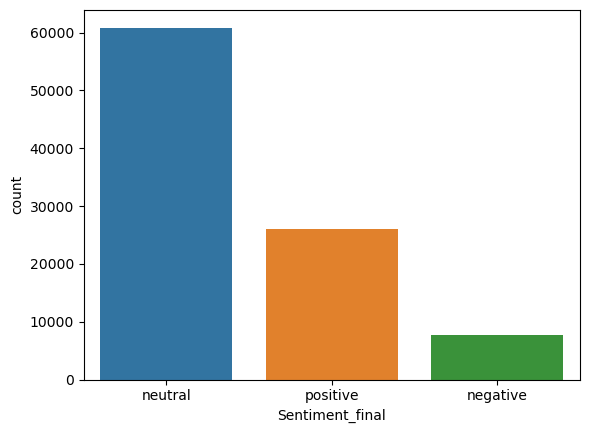

In [102]:
sns.countplot(data=df_clean,x='Sentiment_final')

In [135]:

df_clean.groupby(['Sentiment_final']).size().reset_index(name='counts')

,Sentiment_final,counts
0,negative,7731
1,neutral,60851
2,positive,26066


- Lemmatization: transform word to their original form

In [103]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [104]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADJ
    else:
        return wordnet.NOUN

In [105]:
def lemmatizer(sentence):
    words_and_tags = nltk.pos_tag(word_tokenize(sentence))
    lemmas = []
    for word, tag in words_and_tags:
        lemma = WordNetLemmatizer().lemmatize(word,pos=get_wordnet_pos(tag))
        lemmas.append(lemma)
    return ' '.join(lemmas)

In [181]:
df_clean['Token'] = df_clean['Token'].apply(lambda x: x.lower())

In [182]:
df_clean['lemmatized'] = df_clean['Token'].apply(lemmatizer)

In [183]:
df_clean

,time_text,messages_eng,Sentiment_final,Token,lemmatized
0,-0:24,México :sparkles::heart_on_fire:,neutral,:heart_on_fire méxico sparkles,: heart_on_fire méxico sparkle
1,-0:23,:blue_heart:,neutral,blue_heart,blue_heart
2,-0:23,Indonesia,neutral,indonesia,indonesia
3,-0:23,Vietnam,neutral,vietnam,vietnam
4,-0:21,Vietnam,neutral,vietnam,vietnam
...,...,...,...,...,...
100518,3:47:41,Ing Fah secondary,neutral,ing fah secondary,ing fah secondary
100519,3:47:41,"The best, Thailand",positive,thailand best,thailand best
100520,3:47:42,Elder Fah is the best. Suppose: Crown: Leff,positive,crown suppose fah elder leff best,crown suppose fah elder leff best
100521,3:47:42,"Alright, elder Ing has come so far.",positive,ing alright far come elder,ing alright far come elder


In [189]:
df_clean['lemmatized'] = df_clean['lemmatized'].apply(lambda x: x.upper())

WORDCLOUD : MOST FREQUENT WORD IN COMMENT

In [109]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from PIL import Image

In [190]:
df_positive = df_clean.loc[df_clean['Sentiment_final'] == 'positive']
df_netural = df_clean.loc[df_clean['Sentiment_final'] == 'neutral']
df_negative = df_clean.loc[df_clean['Sentiment_final'] == 'negative']

- Postive Sentiment WordCloud

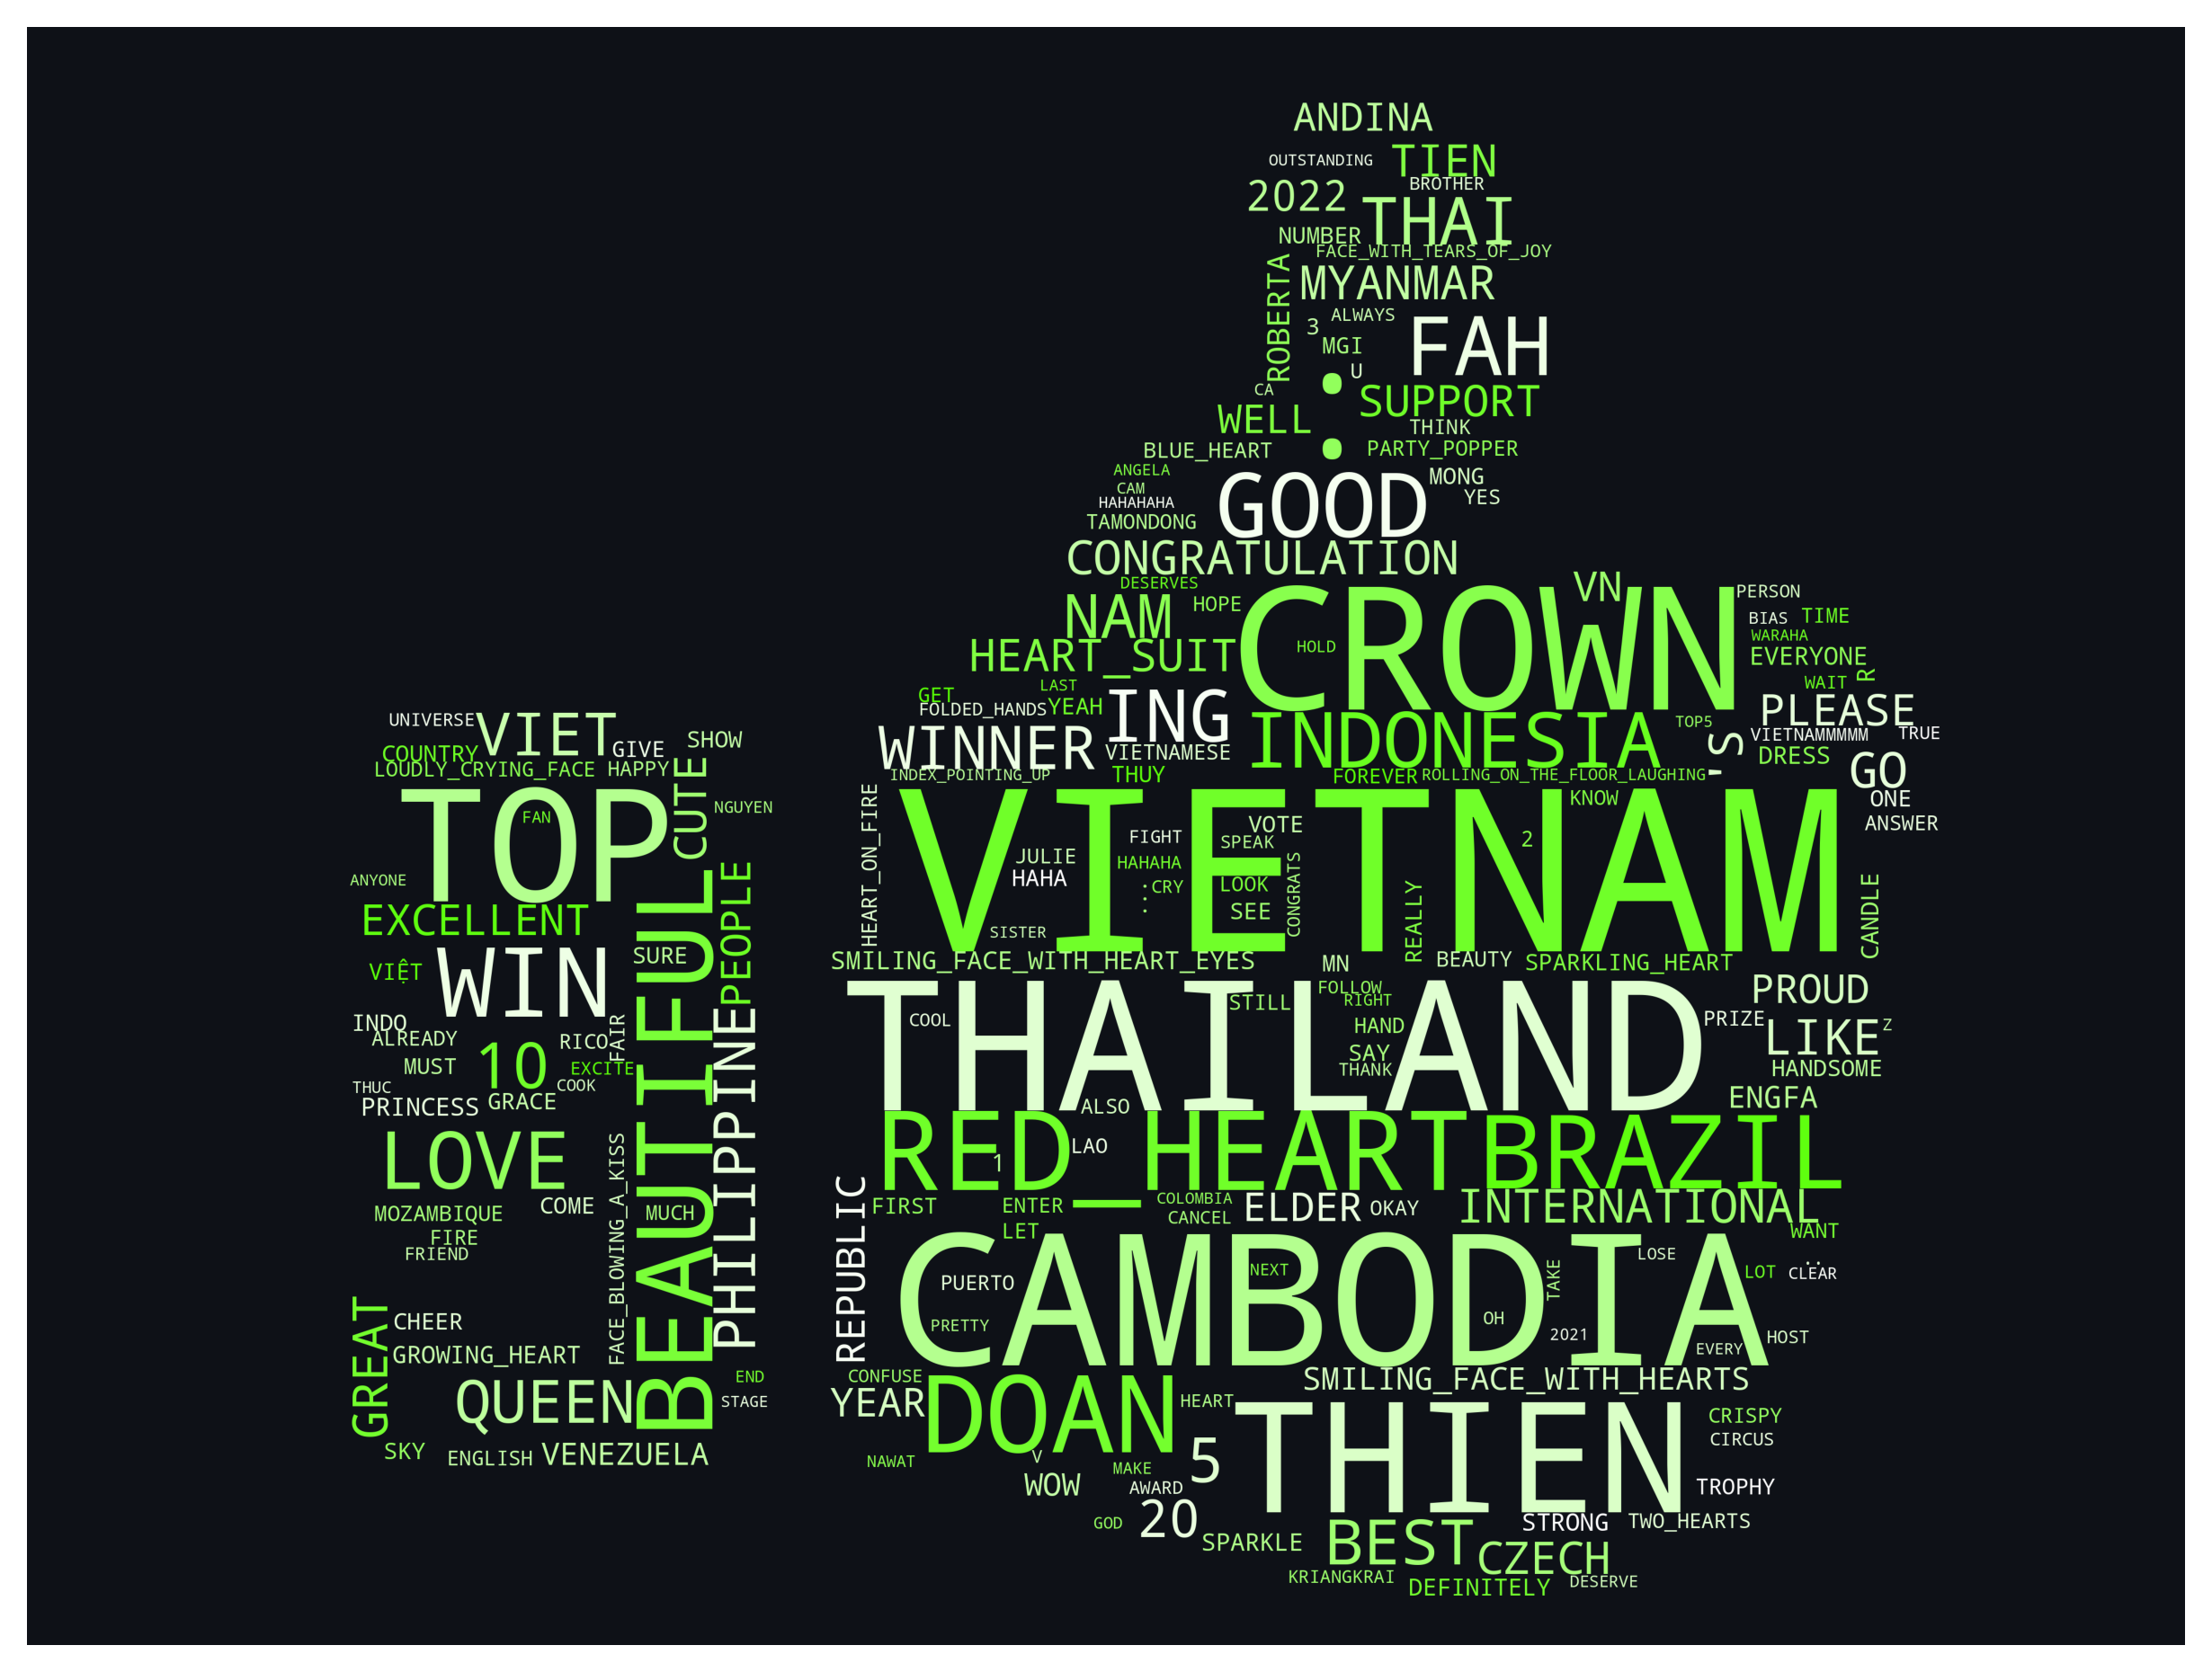

In [236]:

fdist = FreqDist(df_positive['lemmatized'].str.split().apply(pd.Series).stack())

mask_pos = np.array(Image.open('upvote.png'))
#colors = ImageColorGenerator(mask_pos)
def green_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(100,100%%, %d%%)" % np.random.randint(51,101))


wordcloud_pos = WordCloud(
                background_color ='#0E1117', 
                min_font_size = 10, mask = mask_pos,
                width = mask_pos.shape[1], height = mask_pos.shape[0],
                color_func= green_color_func,
                random_state=31).generate_from_frequencies(fdist)

# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None,dpi=300,frameon=False) 
plt.imshow(wordcloud_pos) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


- Negative Sentiment WordCloud

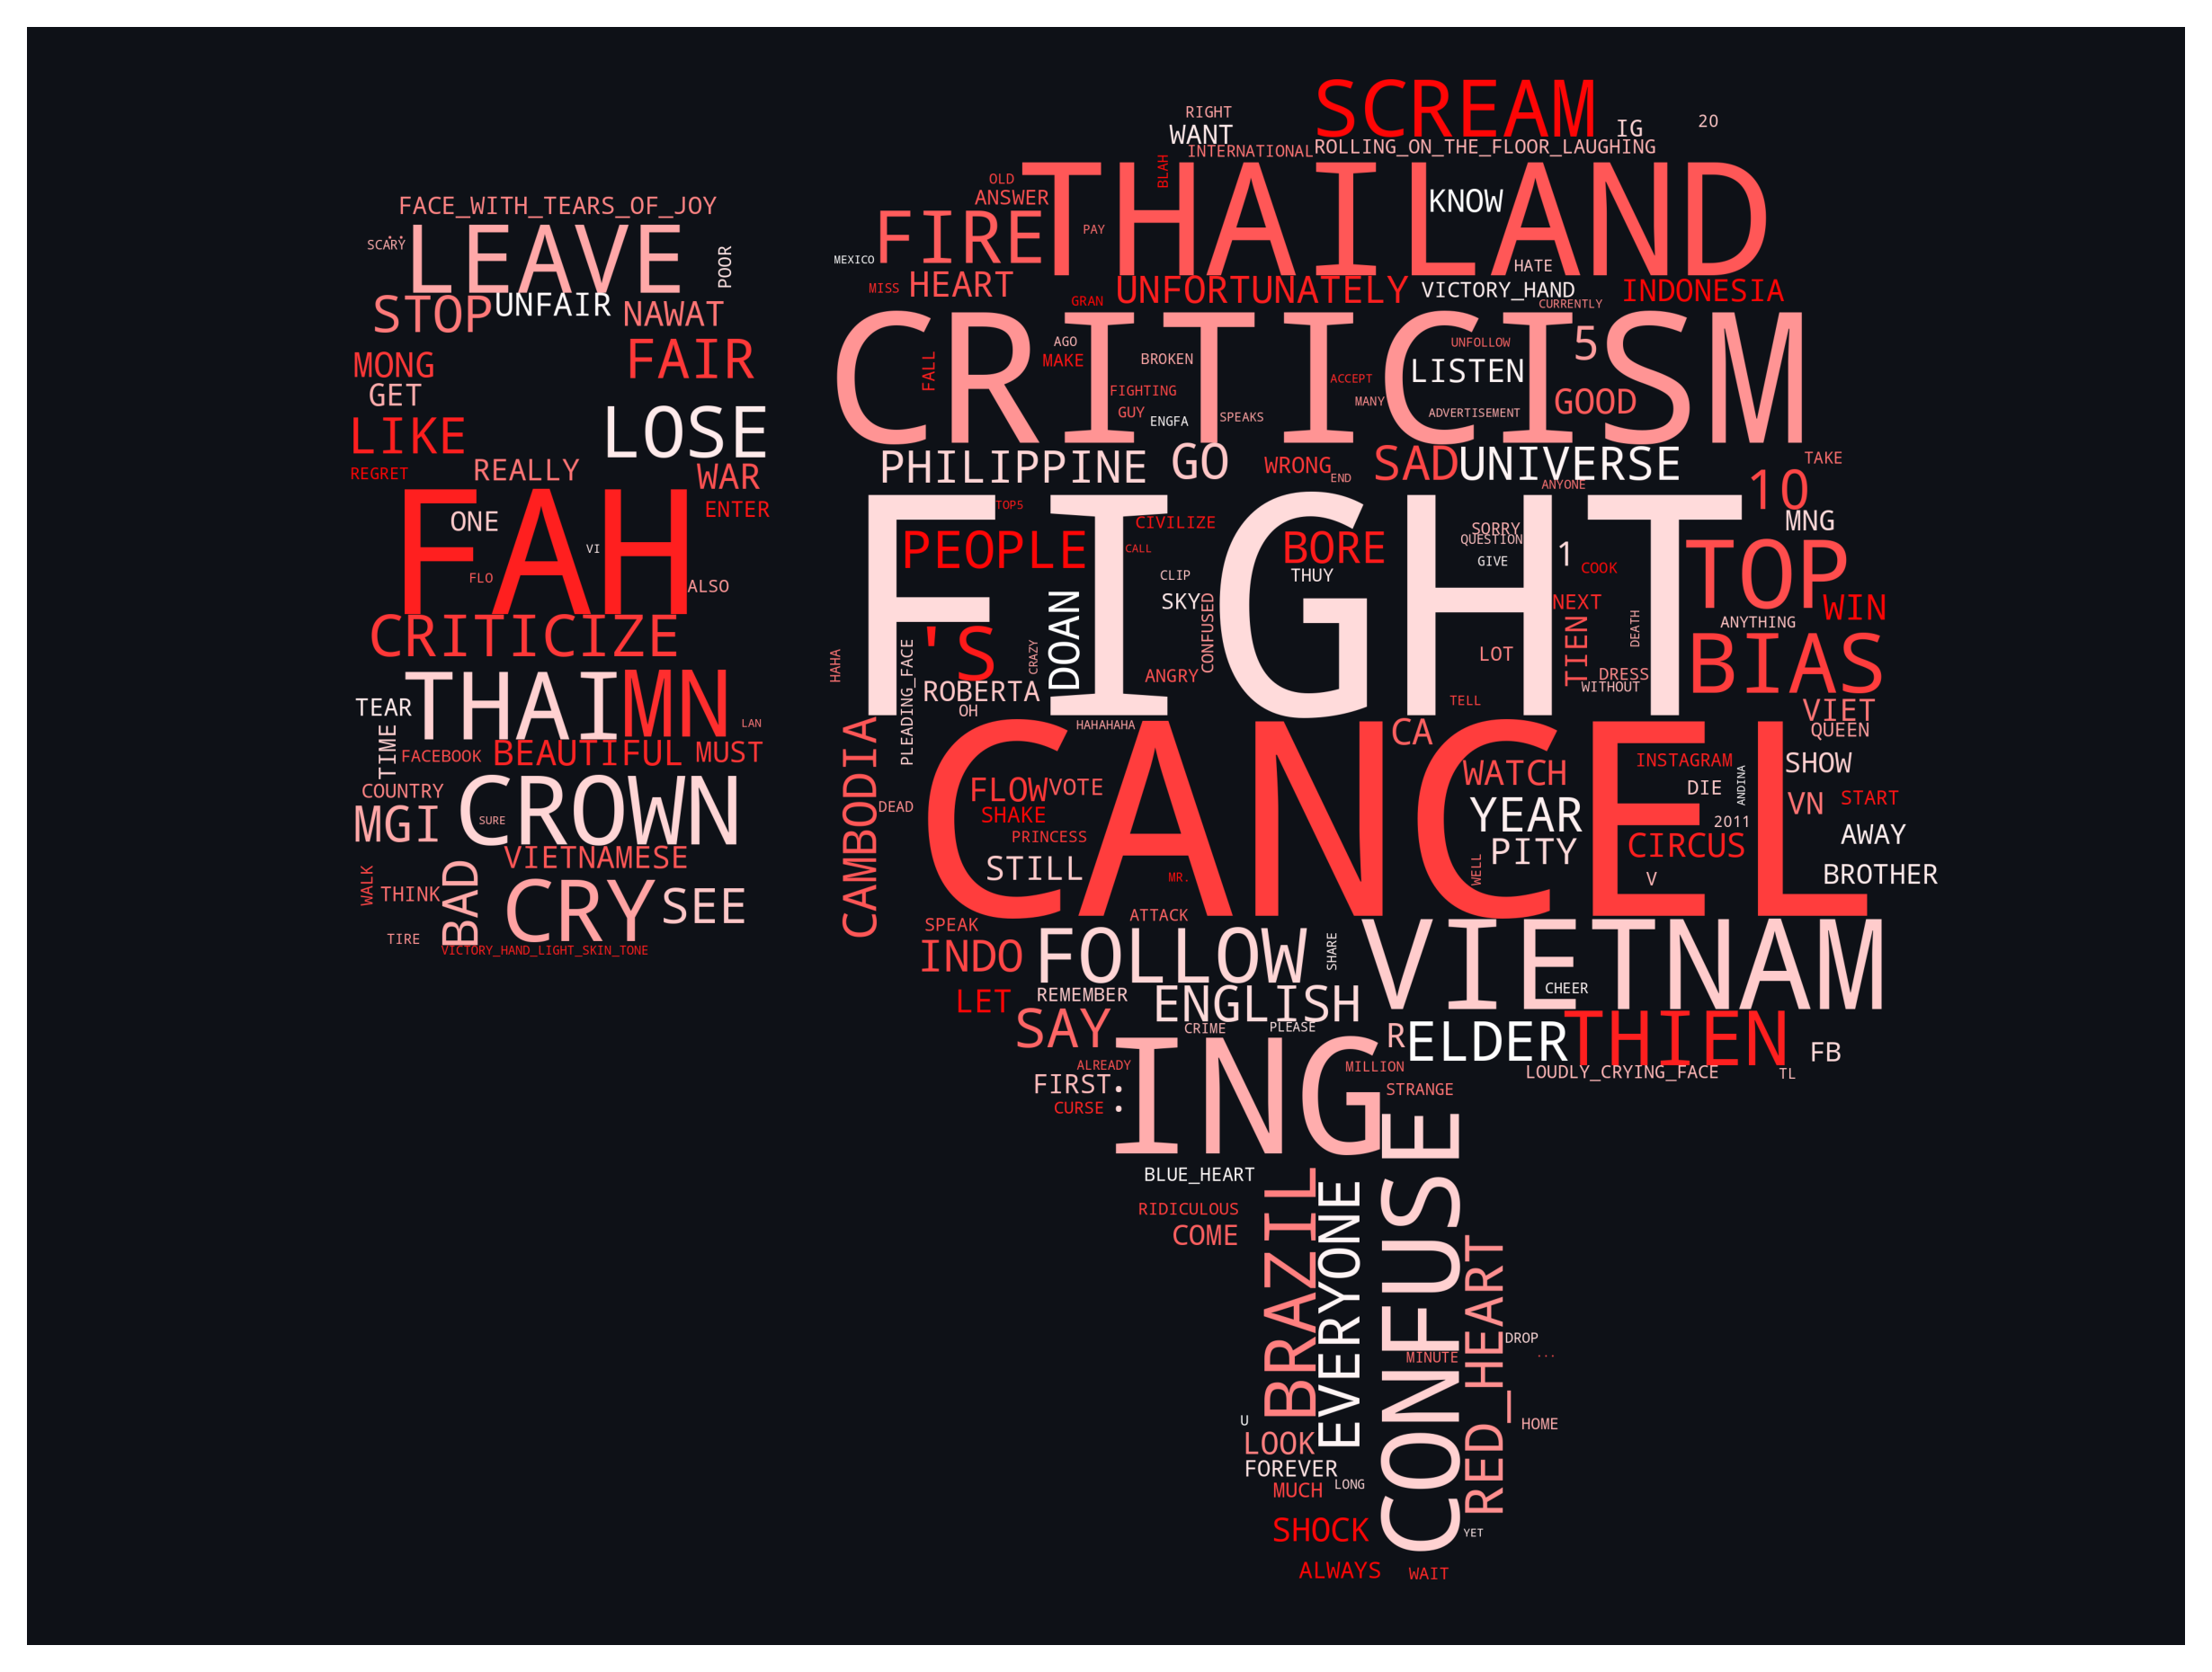

In [235]:
# Create a frequency distribution of the words in the lemmatized column
fdist = FreqDist(df_negative['lemmatized'].str.split().apply(pd.Series).stack())

mask_neg = np.array(Image.open('downvote.png'))

def red_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0, 100%%, %d%%)" % (np.random.randint(51,101)))


# Create a word cloud object
wordcloud_neg = WordCloud(
                background_color ='#0E1117', 
                min_font_size = 10, mask = mask_neg,
                width = mask_neg.shape[1], height = mask_neg.shape[0],
                color_func= red_color_func,
                random_state=41).generate_from_frequencies(fdist)

# Display the word cloud
plt.figure(figsize = (8, 8),  facecolor = None,dpi=300,frameon=False) 
plt.imshow(wordcloud_neg) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# MISS UNIVERSE DATA

In [113]:
mu_data = pd.read_csv('df_mu.csv')
mu_data

,timestamp,time,time_text,message,dtect_lang,trans_eng
0,2023-01-15 07:48:30,07:48:30,-0:04,🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷costa rica 🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨...,it,🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷Costa Rica 🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨...
1,2023-01-15 07:48:30,07:48:30,-0:04,Indonesian,en,Indonesian
2,2023-01-15 07:48:30,07:48:30,-0:04,🇨🇴,und,🇨🇴
3,2023-01-15 07:48:30,07:48:30,-0:04,🇪🇸:red_heart:🇪🇸:red_heart:🇪🇸:red_heart:🇪🇸:red_...,en,🇪🇸:red_heart:🇪🇸:red_heart:🇪🇸:red_heart:🇪🇸:red_...
4,2023-01-15 07:48:31,07:48:31,-0:04,ASIAN BEAUTY QUEENS ARE HORRIBLE,en,ASIAN BEAUTY QUEENS ARE HORRIBLE
...,...,...,...,...,...,...
196493,2023-01-15 11:20:05,11:20:05,3:10:50,555555กลัวโดนทัวลงเเอน555,th,Hahahahaha
196494,2023-01-15 11:20:11,11:20:11,3:10:56,take Thailand in what about his business :slig...,en,take Thailand in what about his business :slig...
196495,2023-01-15 11:20:11,11:20:11,3:10:56,USA ก็ไม่แย่นะ แต่แบบ แต่ก็นั่นแหละ อืมมม,th,"USA is not bad, but like that's it."
196496,2023-01-15 11:20:13,11:20:13,3:10:59,.,und,.


In [222]:
df_mu_msg = mu_data.drop(columns = ['dtect_lang'])
df_mu_msg.dropna(inplace=True)
df_mu_msg.drop(df_mu_msg.loc[df_mu_msg['trans_eng'] == 'error'].index, inplace=True)

display(df_mu_msg.info())
display(df_mu_msg.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196498 entries, 0 to 196497
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   timestamp  196498 non-null  object
 1   time       196498 non-null  object
 2   time_text  196498 non-null  object
 3   message    196498 non-null  object
 4   trans_eng  196498 non-null  object
dtypes: object(5)
memory usage: 7.5+ MB


None

,timestamp,time,time_text,message,trans_eng
0,2023-01-15 07:48:30,07:48:30,-0:04,🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷costa rica 🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨...,🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷Costa Rica 🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨...
1,2023-01-15 07:48:30,07:48:30,-0:04,Indonesian,Indonesian
2,2023-01-15 07:48:30,07:48:30,-0:04,🇨🇴,🇨🇴
3,2023-01-15 07:48:30,07:48:30,-0:04,🇪🇸:red_heart:🇪🇸:red_heart:🇪🇸:red_heart:🇪🇸:red_...,🇪🇸:red_heart:🇪🇸:red_heart:🇪🇸:red_heart:🇪🇸:red_...
4,2023-01-15 07:48:31,07:48:31,-0:04,ASIAN BEAUTY QUEENS ARE HORRIBLE,ASIAN BEAUTY QUEENS ARE HORRIBLE


EMOJI DETECTION, REMOVAL, COUNT, TRANSFORM

- Emoji Detection and Remove Emoji Flag

In [223]:
list_message_mu = df_mu_msg['message'].tolist()
emoji_summary_mu = adv.extract_emoji(list_message_mu)

In [224]:
df_mu_msg['msg_emoji_noflag'] = df_mu_msg['trans_eng'].apply(remove_emoji_flag)
df_mu_msg

,timestamp,time,time_text,message,trans_eng,msg_emoji_noflag
0,2023-01-15 07:48:30,07:48:30,-0:04,🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷costa rica 🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨...,🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷Costa Rica 🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨...,Costa Rica
1,2023-01-15 07:48:30,07:48:30,-0:04,Indonesian,Indonesian,Indonesian
2,2023-01-15 07:48:30,07:48:30,-0:04,🇨🇴,🇨🇴,
3,2023-01-15 07:48:30,07:48:30,-0:04,🇪🇸:red_heart:🇪🇸:red_heart:🇪🇸:red_heart:🇪🇸:red_...,🇪🇸:red_heart:🇪🇸:red_heart:🇪🇸:red_heart:🇪🇸:red_...,:red_heart::red_heart::red_heart::red_heart::r...
4,2023-01-15 07:48:31,07:48:31,-0:04,ASIAN BEAUTY QUEENS ARE HORRIBLE,ASIAN BEAUTY QUEENS ARE HORRIBLE,ASIAN BEAUTY QUEENS ARE HORRIBLE
...,...,...,...,...,...,...
196493,2023-01-15 11:20:05,11:20:05,3:10:50,555555กลัวโดนทัวลงเเอน555,Hahahahaha,Hahahahaha
196494,2023-01-15 11:20:11,11:20:11,3:10:56,take Thailand in what about his business :slig...,take Thailand in what about his business :slig...,take Thailand in what about his business :slig...
196495,2023-01-15 11:20:11,11:20:11,3:10:56,USA ก็ไม่แย่นะ แต่แบบ แต่ก็นั่นแหละ อืมมม,"USA is not bad, but like that's it.","USA is not bad, but like that's it."
196496,2023-01-15 11:20:13,11:20:13,3:10:59,.,.,.


- Emoji Summary(Exclude Flag) and Count

In [225]:
list_message_mu = df_mu_msg['msg_emoji_noflag'].tolist()
emoji_summary_mu = adv.extract_emoji(list_message_mu)

In [228]:
df_emoji_mu = pd.DataFrame(emoji_summary_mu['top_emoji'])
df_emoji_mu = df_emoji_mu.rename(columns={0:'Emoji',1:'Count'})
total_emoji_mu = df_emoji_mu['Count'].sum()
df_emoji_mu['Percent'] = (df_emoji_mu['Count'] / total_emoji_mu)*100
df_emoji_mu

,Emoji,Count,Percent
0,👎🏻,1984,32.766309
1,👸🏼,604,9.975227
2,👸🏻,442,7.299752
3,👏🏻,426,7.035508
4,1⃣,345,5.697770
...,...,...,...
91,♥,1,0.016515
92,🆗,1,0.016515
93,🧚🏼,1,0.016515
94,👍🏽,1,0.016515


- Convert Emoji to Text

In [118]:
df_mu_msg['messages_eng'] = df_mu_msg['msg_emoji_noflag'].apply(convert_emoji)
df_mu_msg

,timestamp,time,time_text,message,trans_eng,msg_emoji_noflag,messages_eng
0,2023-01-15 07:48:30,07:48:30,-0:04,🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷costa rica 🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨...,🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷Costa Rica 🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨...,Costa Rica,Costa Rica
1,2023-01-15 07:48:30,07:48:30,-0:04,Indonesian,Indonesian,Indonesian,Indonesian
2,2023-01-15 07:48:30,07:48:30,-0:04,🇨🇴,🇨🇴,,
3,2023-01-15 07:48:30,07:48:30,-0:04,🇪🇸:red_heart:🇪🇸:red_heart:🇪🇸:red_heart:🇪🇸:red_...,🇪🇸:red_heart:🇪🇸:red_heart:🇪🇸:red_heart:🇪🇸:red_...,:red_heart::red_heart::red_heart::red_heart::r...,:red_heart::red_heart::red_heart::red_heart::r...
4,2023-01-15 07:48:31,07:48:31,-0:04,ASIAN BEAUTY QUEENS ARE HORRIBLE,ASIAN BEAUTY QUEENS ARE HORRIBLE,ASIAN BEAUTY QUEENS ARE HORRIBLE,ASIAN BEAUTY QUEENS ARE HORRIBLE
...,...,...,...,...,...,...,...
196493,2023-01-15 11:20:05,11:20:05,3:10:50,555555กลัวโดนทัวลงเเอน555,Hahahahaha,Hahahahaha,Hahahahaha
196494,2023-01-15 11:20:11,11:20:11,3:10:56,take Thailand in what about his business :slig...,take Thailand in what about his business :slig...,take Thailand in what about his business :slig...,take Thailand in what about his business :slig...
196495,2023-01-15 11:20:11,11:20:11,3:10:56,USA ก็ไม่แย่นะ แต่แบบ แต่ก็นั่นแหละ อืมมม,"USA is not bad, but like that's it.","USA is not bad, but like that's it.","USA is not bad, but like that's it."
196496,2023-01-15 11:20:13,11:20:13,3:10:59,.,.,.,.


EXTRACT COUNTRY FROM MESSAGES

In [119]:
df_mu_msg.drop(columns=['trans_eng','msg_emoji_noflag'],inplace=True)

SENTENCE POLARIZATION

In [120]:
# predict sentiment from each technique and pick the highest vote result

df_mu_msg['opinion_TextBlob'] = df_mu_msg['messages_eng'].apply(sentiment_analysis_textblob)
df_mu_msg['opinion_nltk'] = df_mu_msg['messages_eng'].apply(sentiment_analysis_nltk)
df_mu_msg['opinion_vader'] = df_mu_msg['messages_eng'].apply(sentiment_analysis_vader)

df_mu_msg['Sentiment_TextBlob'] = df_mu_msg['opinion_TextBlob'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
df_mu_msg['Sentiment_nltk'] = df_mu_msg['opinion_nltk'].apply(lambda x: 'positive' if x['compound'] > 0 else ('negative' if x['compound'] < 0 else 'neutral'))
df_mu_msg['Sentiment_vader'] = df_mu_msg['opinion_vader'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

df_count_mu = df_mu_msg[['Sentiment_TextBlob','Sentiment_nltk','Sentiment_vader']].apply(lambda x: x.value_counts(), axis=1)
df_mu_msg['Sentiment_final'] = df_count_mu.idxmax(axis=1)

In [121]:
df_mu_msg

,timestamp,time,time_text,message,messages_eng,opinion_TextBlob,opinion_nltk,opinion_vader,Sentiment_TextBlob,Sentiment_nltk,Sentiment_vader,Sentiment_final
0,2023-01-15 07:48:30,07:48:30,-0:04,🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷costa rica 🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨🇷🇨...,Costa Rica,0.00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0,neutral,neutral,neutral,neutral
1,2023-01-15 07:48:30,07:48:30,-0:04,Indonesian,Indonesian,0.00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0,neutral,neutral,neutral,neutral
2,2023-01-15 07:48:30,07:48:30,-0:04,🇨🇴,,0.00,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0,neutral,neutral,neutral,neutral
3,2023-01-15 07:48:30,07:48:30,-0:04,🇪🇸:red_heart:🇪🇸:red_heart:🇪🇸:red_heart:🇪🇸:red_...,:red_heart::red_heart::red_heart::red_heart::r...,0.00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0,neutral,neutral,neutral,neutral
4,2023-01-15 07:48:31,07:48:31,-0:04,ASIAN BEAUTY QUEENS ARE HORRIBLE,ASIAN BEAUTY QUEENS ARE HORRIBLE,-0.50,"{'neg': 0.34, 'neu': 0.291, 'pos': 0.369, 'com...",1,negative,positive,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
196493,2023-01-15 11:20:05,11:20:05,3:10:50,555555กลัวโดนทัวลงเเอน555,Hahahahaha,0.20,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0,positive,neutral,neutral,neutral
196494,2023-01-15 11:20:11,11:20:11,3:10:56,take Thailand in what about his business :slig...,take Thailand in what about his business :slig...,0.00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0,neutral,neutral,neutral,neutral
196495,2023-01-15 11:20:11,11:20:11,3:10:56,USA ก็ไม่แย่นะ แต่แบบ แต่ก็นั่นแหละ อืมมม,"USA is not bad, but like that's it.",0.35,"{'neg': 0.252, 'neu': 0.567, 'pos': 0.182, 'co...",-1,positive,negative,negative,negative
196496,2023-01-15 11:20:13,11:20:13,3:10:59,.,.,0.00,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0,neutral,neutral,neutral,neutral


TEXT CLEANSING AND TRANSFORM

- Tokenize, Remove Stopword, punctuation, duplicate

In [122]:
df_clean_mu = df_mu_msg.loc[:,['time_text','timestamp','time','messages_eng','Sentiment_final']]
df_clean_mu['Token'] = df_clean_mu['messages_eng'].apply(remove_stopwords_punctuation_duplicate)
df_clean_mu

,time_text,timestamp,time,messages_eng,Sentiment_final,Token
0,-0:04,2023-01-15 07:48:30,07:48:30,Costa Rica,neutral,Rica Costa
1,-0:04,2023-01-15 07:48:30,07:48:30,Indonesian,neutral,Indonesian
2,-0:04,2023-01-15 07:48:30,07:48:30,,neutral,
3,-0:04,2023-01-15 07:48:30,07:48:30,:red_heart::red_heart::red_heart::red_heart::r...,neutral,red_heart :red_heart
4,-0:04,2023-01-15 07:48:31,07:48:31,ASIAN BEAUTY QUEENS ARE HORRIBLE,positive,HORRIBLE QUEENS ASIAN BEAUTY
...,...,...,...,...,...,...
196493,3:10:50,2023-01-15 11:20:05,11:20:05,Hahahahaha,neutral,Hahahahaha
196494,3:10:56,2023-01-15 11:20:11,11:20:11,take Thailand in what about his business :slig...,neutral,business take Thailand slightly_smiling_face
196495,3:10:56,2023-01-15 11:20:11,11:20:11,"USA is not bad, but like that's it.",negative,USA bad 's like
196496,3:10:59,2023-01-15 11:20:13,11:20:13,.,neutral,


<AxesSubplot: xlabel='Sentiment_final', ylabel='count'>

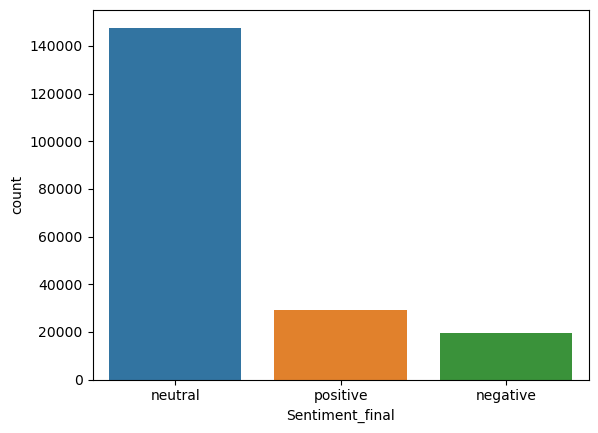

In [123]:
sns.countplot(data=df_clean_mu,x='Sentiment_final')

- Lemmatization: transform word to their original form

In [144]:
df_clean_mu

,time_text,timestamp,time,messages_eng,Sentiment_final,Token,lemmatized
0,-0:04,2023-01-15 07:48:30,07:48:30,Costa Rica,neutral,Rica Costa,RICA COSTA
1,-0:04,2023-01-15 07:48:30,07:48:30,Indonesian,neutral,Indonesian,INDONESIAN
2,-0:04,2023-01-15 07:48:30,07:48:30,,neutral,,
3,-0:04,2023-01-15 07:48:30,07:48:30,:red_heart::red_heart::red_heart::red_heart::r...,neutral,red_heart :red_heart,RED_HEART : RED_HEART
4,-0:04,2023-01-15 07:48:31,07:48:31,ASIAN BEAUTY QUEENS ARE HORRIBLE,positive,HORRIBLE QUEENS ASIAN BEAUTY,HORRIBLE QUEENS ASIAN BEAUTY
...,...,...,...,...,...,...,...
196493,3:10:50,2023-01-15 11:20:05,11:20:05,Hahahahaha,neutral,Hahahahaha,HAHAHAHAHA
196494,3:10:56,2023-01-15 11:20:11,11:20:11,take Thailand in what about his business :slig...,neutral,business take Thailand slightly_smiling_face,BUSINESS TAKE THAILAND SLIGHTLY_SMILING_FACE
196495,3:10:56,2023-01-15 11:20:11,11:20:11,"USA is not bad, but like that's it.",negative,USA bad 's like,USA BAD 'S LIKE
196496,3:10:59,2023-01-15 11:20:13,11:20:13,.,neutral,,


In [145]:
df_clean_mu['Token'] = df_clean_mu['Token'].apply(lambda x: x.lower())

In [146]:
df_clean_mu['lemmatized'] = df_clean_mu['Token'].apply(lemmatizer)

In [125]:
df_clean_mu

,time_text,timestamp,time,messages_eng,Sentiment_final,Token,lemmatized
0,-0:04,2023-01-15 07:48:30,07:48:30,Costa Rica,neutral,Rica Costa,Rica Costa
1,-0:04,2023-01-15 07:48:30,07:48:30,Indonesian,neutral,Indonesian,Indonesian
2,-0:04,2023-01-15 07:48:30,07:48:30,,neutral,,
3,-0:04,2023-01-15 07:48:30,07:48:30,:red_heart::red_heart::red_heart::red_heart::r...,neutral,red_heart :red_heart,red_heart : red_heart
4,-0:04,2023-01-15 07:48:31,07:48:31,ASIAN BEAUTY QUEENS ARE HORRIBLE,positive,HORRIBLE QUEENS ASIAN BEAUTY,HORRIBLE QUEENS ASIAN BEAUTY
...,...,...,...,...,...,...,...
196493,3:10:50,2023-01-15 11:20:05,11:20:05,Hahahahaha,neutral,Hahahahaha,Hahahahaha
196494,3:10:56,2023-01-15 11:20:11,11:20:11,take Thailand in what about his business :slig...,neutral,business take Thailand slightly_smiling_face,business take Thailand slightly_smiling_face
196495,3:10:56,2023-01-15 11:20:11,11:20:11,"USA is not bad, but like that's it.",negative,USA bad 's like,USA bad 's like
196496,3:10:59,2023-01-15 11:20:13,11:20:13,.,neutral,,


Group Time Interval

In [126]:
df_clean_mu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196498 entries, 0 to 196497
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   time_text        196498 non-null  object
 1   timestamp        196498 non-null  object
 2   time             196498 non-null  object
 3   messages_eng     196498 non-null  object
 4   Sentiment_final  196498 non-null  object
 5   Token            196498 non-null  object
 6   lemmatized       196498 non-null  object
dtypes: object(7)
memory usage: 10.5+ MB


In [127]:
df_clean_mu.to_csv('df_clean_mu.csv',index=False)

In [147]:
df_clean_mu['lemmatized'] = df_clean_mu['lemmatized'].apply(lambda x: x.upper())

WORDCLOUD : MOST FREQUENT WORD IN COMMENT

In [148]:
df_positive_mu = df_clean_mu.loc[df_clean_mu['Sentiment_final'] == 'positive']
df_netural_mu = df_clean_mu.loc[df_clean_mu['Sentiment_final'] == 'neutral']
df_negative_mu = df_clean_mu.loc[df_clean_mu['Sentiment_final'] == 'negative']

In [154]:
df_positive_mu

,time_text,timestamp,time,messages_eng,Sentiment_final,Token,lemmatized
4,-0:04,2023-01-15 07:48:31,07:48:31,ASIAN BEAUTY QUEENS ARE HORRIBLE,positive,horrible queens asian beauty,HORRIBLE QUEEN ASIAN BEAUTY
17,-0:02,2023-01-15 07:48:32,07:48:32,May the Vice Win !!!: Blue_Heart :: Yellow_Hea...,positive,red_heart vice may blue_heart win yellow_heart,RED_HEART VICE MAY BLUE_HEART WIN YELLOW_HEART
29,-0:01,2023-01-15 07:48:33,07:48:33,"Go Philippines! All out support from Toronto, ...",positive,heart_suit crown philippines canada toronto go...,HEART_SUIT CROWN PHILIPPINE CANADA TORONTO GO ...
75,0:01,2023-01-15 07:48:43,07:48:43,It is delayed like costumes,positive,delayed like costumes,DELAY LIKE COSTUME
78,0:02,2023-01-15 07:48:43,07:48:43,Pamela love,positive,love pamela,LOVE PAMELA
...,...,...,...,...,...,...,...
196470,3:09:13,2023-01-15 11:18:27,11:18:27,"USA is assumed. Sadly, Kurase MU is MU >> MU s...",positive,usa cheering beautiful kurase sadly atmosphere...,USA CHEER BEAUTIFUL KURASE SADLY ATMOSPHERE AS...
196476,3:09:44,2023-01-15 11:18:58,11:18:58,How? Come to sit and bless the people to surre...,positive,come people hahahaha surrender wow sit usa bless,COME PEOPLE HAHAHAHA SURRENDER WOW SIT USA BLESS
196481,3:09:59,2023-01-15 11:19:13,11:19:13,"I want Tier Ann, Facebook, Jesse to compete a ...",positive,tier lot facebook want compete ann jesse,TIER LOT FACEBOOK WANT COMPETE ANN JESSE
196482,3:10:00,2023-01-15 11:19:15,11:19:15,"Change the judges, haha.",positive,judges change haha,JUDGE CHANGE HAHA


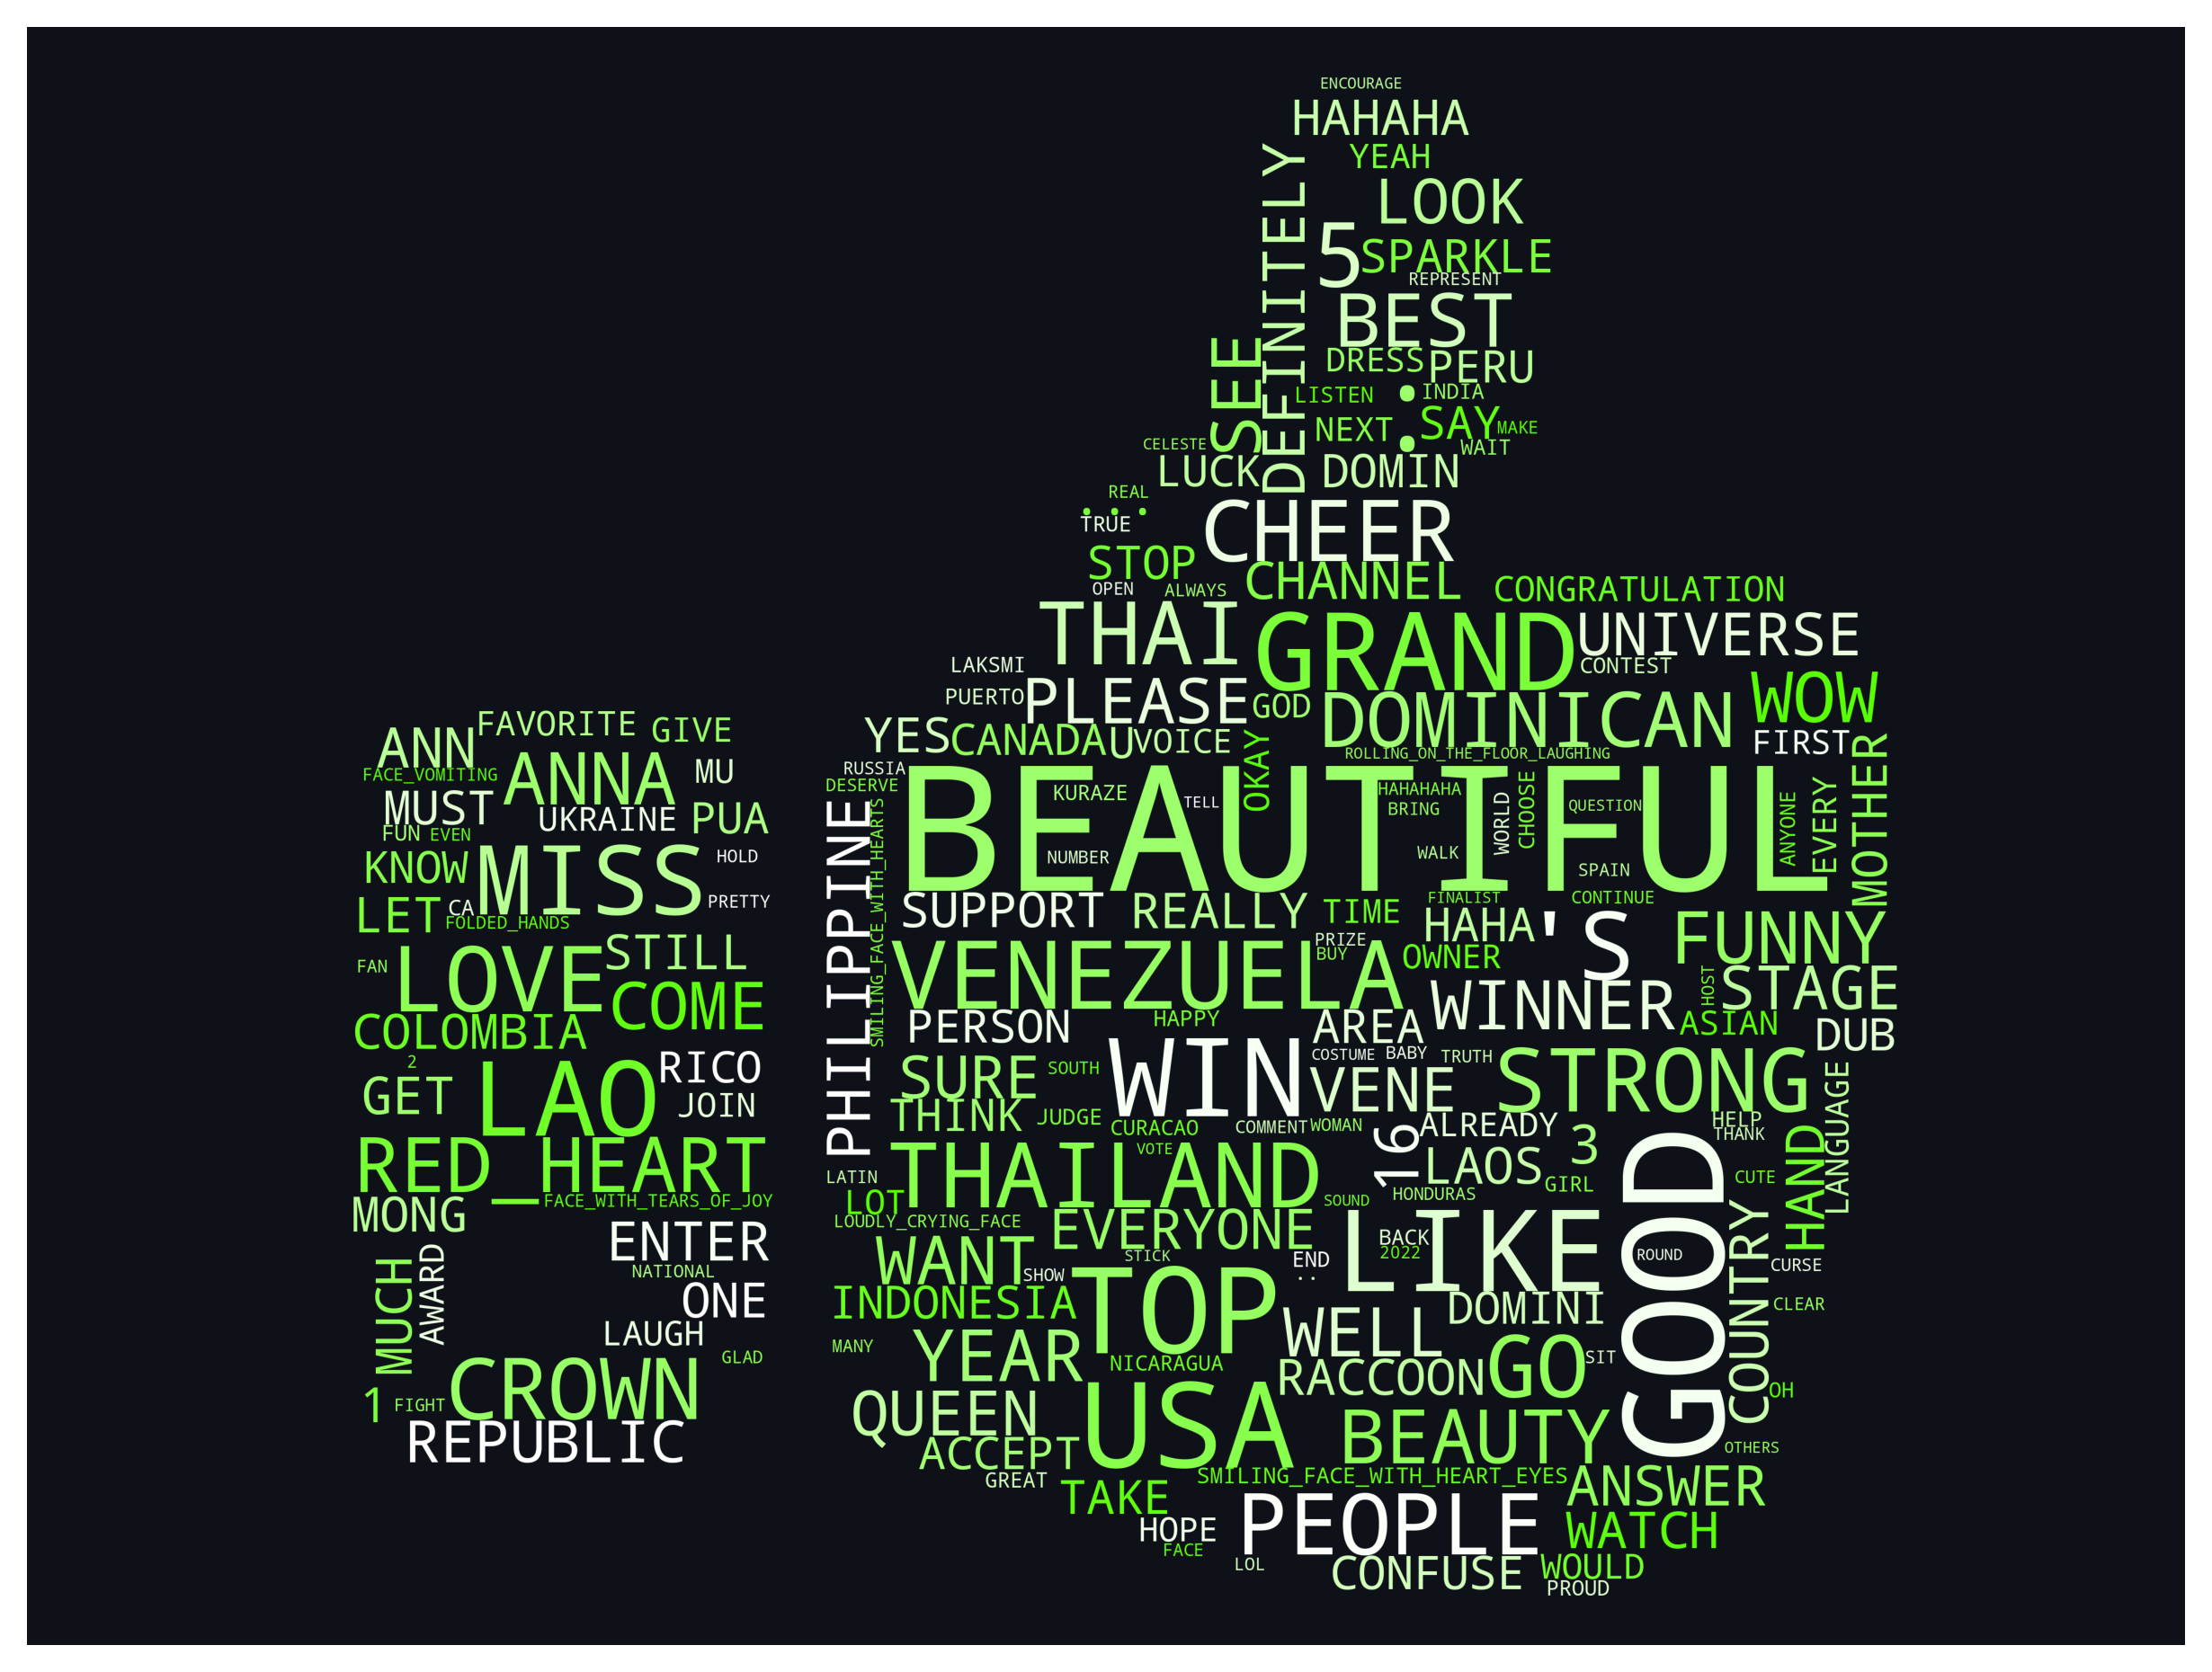

In [234]:
fdist = FreqDist(df_positive_mu['lemmatized'].str.split().apply(pd.Series).stack())

mask_pos = np.array(Image.open('upvote.png'))
#colors = ImageColorGenerator(mask_pos)
def green_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(100,100%%, %d%%)" % np.random.randint(51,101))


wordcloud_pos = WordCloud(
                background_color ='#0E1117', 
                min_font_size = 10, mask = mask_pos,
                width = mask_pos.shape[1], height = mask_pos.shape[0],
                color_func= green_color_func,
                random_state=31).generate_from_frequencies(fdist)


# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None,dpi=300,frameon=False)
plt.imshow(wordcloud_pos) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

- Negative Sentiment WordCloud

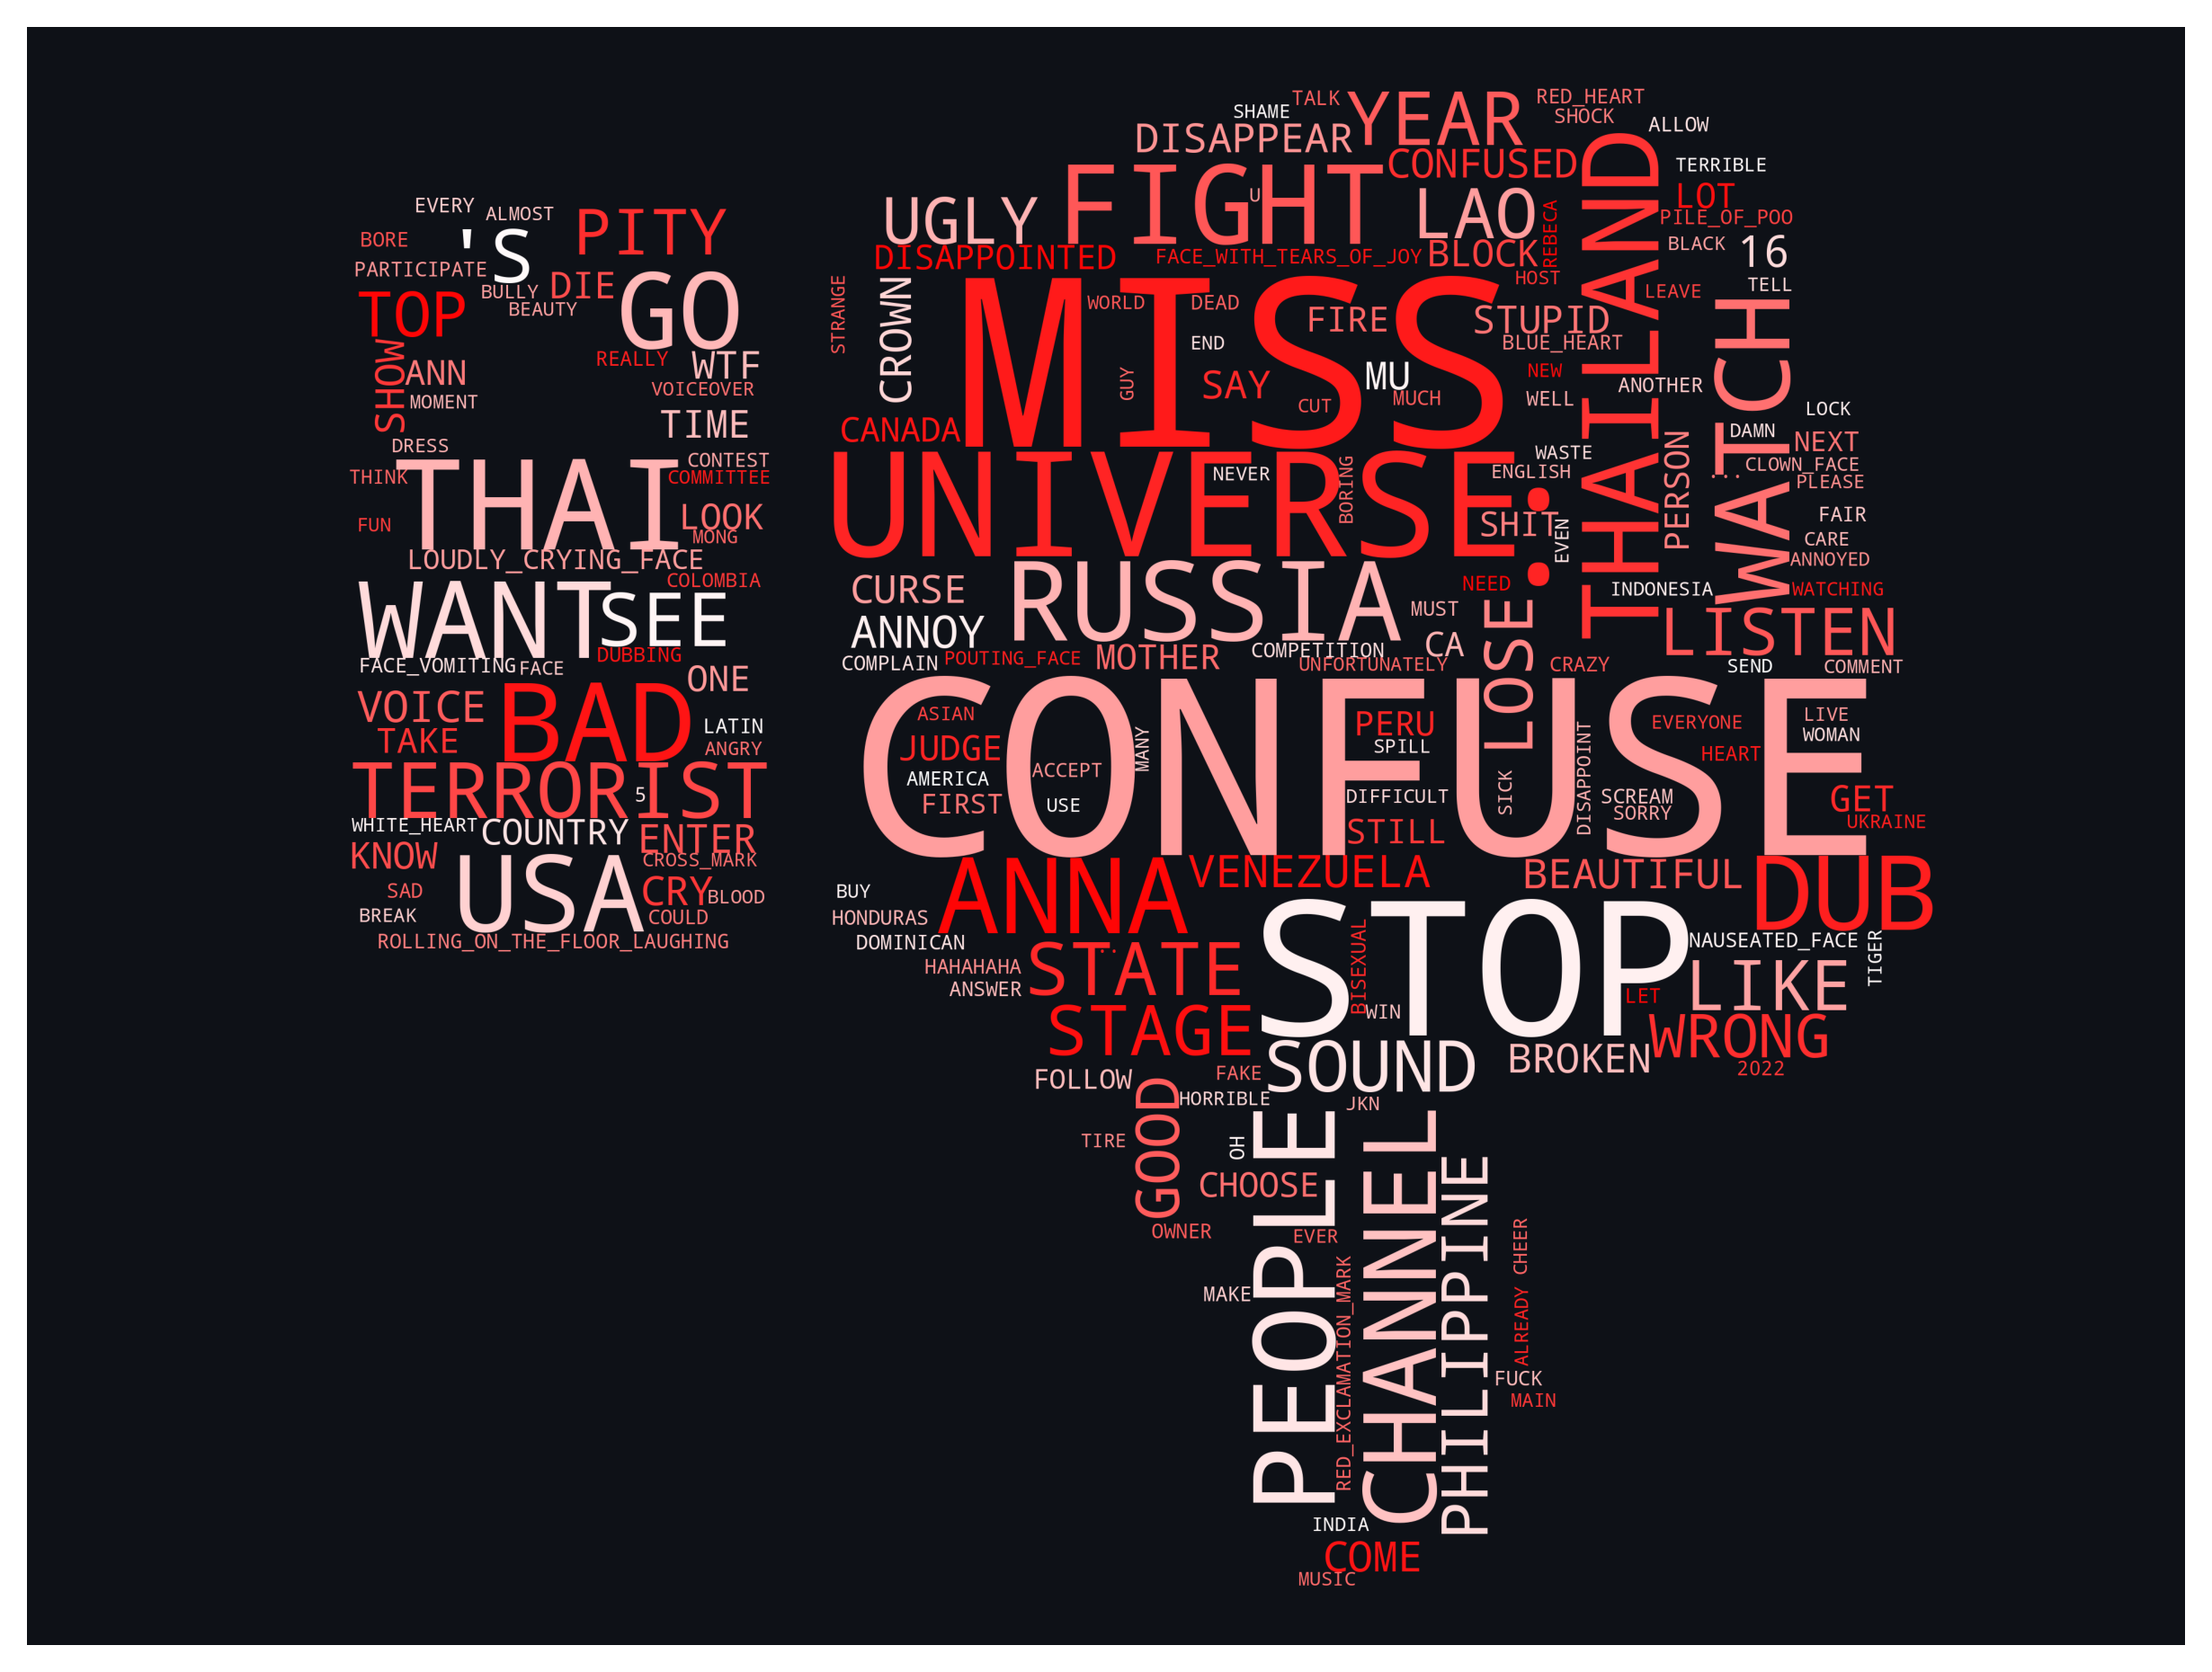

In [233]:
# Create a frequency distribution of the words in the lemmatized column
fdist = FreqDist(df_negative_mu['lemmatized'].str.split().apply(pd.Series).stack())

mask_neg = np.array(Image.open('downvote.png'))

def red_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0, 100%%, %d%%)" % (np.random.randint(51,101)))


# Create a word cloud object
wordcloud_neg = WordCloud(
                background_color ='#0E1117', 
                min_font_size = 10, mask = mask_neg,
                width = mask_neg.shape[1], height = mask_neg.shape[0],
                color_func= red_color_func,
                random_state=41).generate_from_frequencies(fdist)


# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None,dpi=300,frameon=False) 
plt.imshow(wordcloud_neg) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 